心得報告:

這次的作業我了解到wiener濾波器的功能，wiener濾波器除了可以有效去除雜訊外，也不會像是均值濾波把周遭模糊。並且對於使用傅立葉轉換也更加熟悉。而關於使用和不使用FFT的效能比較，雖然我下方程式的執行結果顯示不使用FFT比較快，但如果filter從3*3變成更大，那速度就會比用傅立葉轉換來要慢

使用及不使用FFT製作Wiener濾波器之效能比較

不使用FFT

<Figure size 640x480 with 0 Axes>

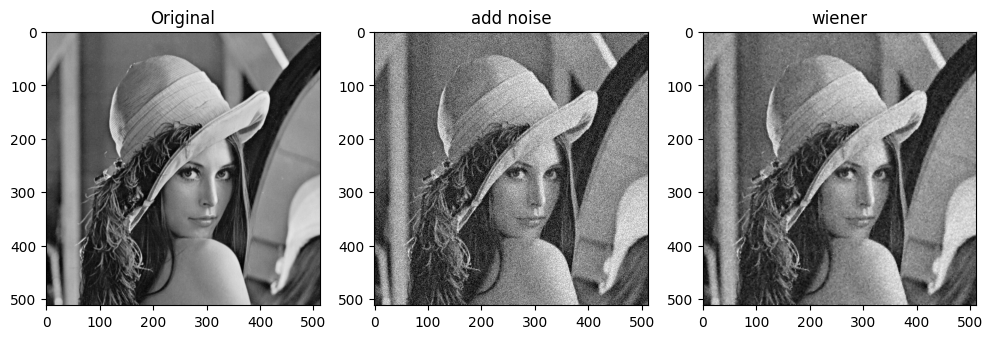

execution time: 0.876942 秒


In [ ]:
from skimage import io,util
from scipy.signal import wiener
import numpy as np
import matplotlib.pyplot as plt
import time

start_time=time.process_time()  #start timming
img = io.imread('lena.png',as_gray=True)
imgn = util.noise.random_noise(img,mode ='gaussian')
brn = wiener(imgn,[3,3])

fig = plt.figure()
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(131)
ax1.imshow(img,cmap='gray')
ax1.set_title('Original')
ax2 = fig.add_subplot(132)
ax2.imshow(imgn,cmap='gray')
ax2.set_title('add noise')
ax3 = fig.add_subplot(133)
ax3.imshow(brn,cmap='gray')
ax3.set_title('wiener')
plt.show()
end_time=time.process_time()# end timing
print(f"execution time: {end_time - start_time:.6f} 秒")

使用FFT

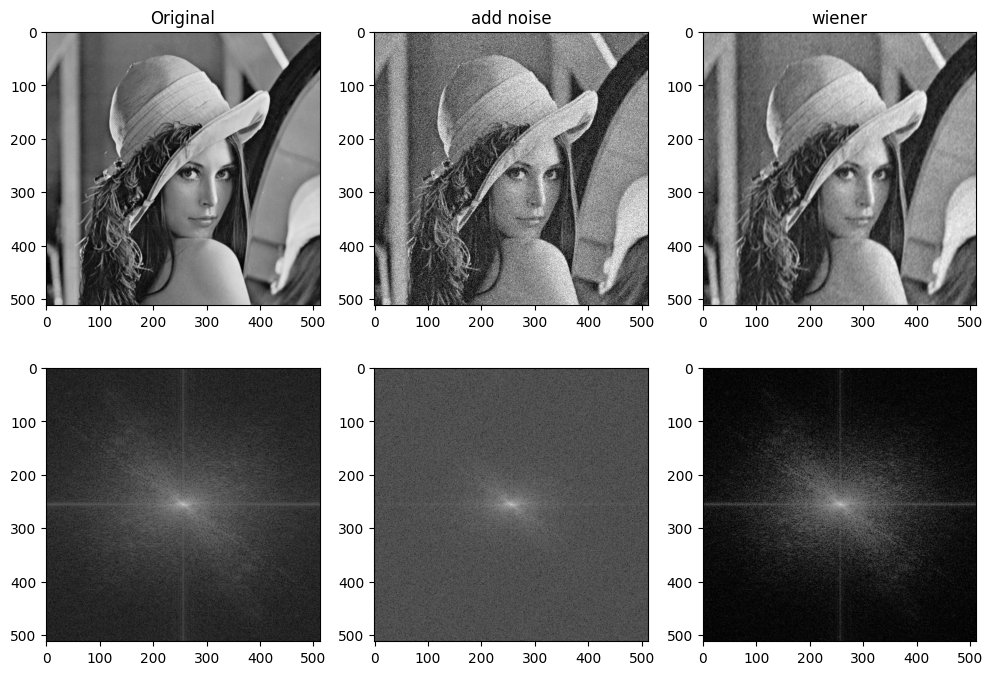

execution time: 1.471408 秒


In [ ]:
from skimage import io,util
from numpy.fft import *
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
import time

start_time=time.process_time()  #start timming
c = io.imread('lena.png',as_gray="True")
c_noise = util.noise.random_noise(c,mode ='gaussian')
cf = fftshift(fft2(c))
c_noisef = fftshift(fft2(c_noise))

ar = np.arange(-256,256)#建立256*256的坐標矩陣
x,y = np.meshgrid(ar,ar)

noise = np.mean(np.abs(fftshift(fft2(c_noise - c)))**2)

img_square = np.abs(cf)**2
wiener = img_square / (img_square + noise)

filtered_cf = c_noisef * wiener
filtered_image = np.real(ifft2(ifftshift(filtered_cf)))

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(231)
ax1.set_title('Original')
ax1.imshow(c,cmap='gray')

ax2 = fig.add_subplot(232)
ax2.set_title('add noise')
ax2.imshow(c_noise, cmap='gray')

ax3 = fig.add_subplot(233)
ax3.set_title('wiener')
ax3.imshow(filtered_image, cmap='gray')

ax4 = fig.add_subplot(234)
ax4.imshow(np.log(1+abs(cf)),cmap='gray')

ax5 = fig.add_subplot(235)
ax5.imshow(np.log(1+abs(c_noisef)), cmap='gray')

ax6 = fig.add_subplot(236)
ax6.imshow(np.log(1+abs(filtered_cf)), cmap='gray')
plt.show()

end_time=time.process_time()# end timing
print(f"execution time: {end_time - start_time:.6f} 秒")